In [1]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
from heatflux_functions import *
from data_accessors import *
import xarray as xr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys,os

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *



plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})


def replace_guards(var):
    """
	This in-place replaces the points in the guard cells with the points on the boundary
    
    """
    # Strip the edge guard cells
    var = var[1:-1]

    var[0] = 0.5*(var[0] + var[1])
    var[-1] = 0.5*(var[-1] + var[-2])
    return var

In [2]:
ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}

In [29]:
neon_fraction = 0.02

# selective collisions
snb = xh.open(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-07_selective_collisions/alpha_snb/neon_{neon_fraction}').isel(t=-1)
sh = xh.open(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-07_selective_collisions/alpha_-1/neon_{neon_fraction}').isel(t=-1)
# fl02 = xh.open(
#     f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-07_selective_collisions/alpha_0.2/neon_{neon_fraction}').isel(t=-1)
fl006 = xh.open(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-07_selective_collisions/alpha_0.06/neon_{neon_fraction}').isel(t=-1)

# Old data
ds_sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == neon_fraction)]
ds_snb = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == neon_fraction)]
ds_02 = ds[(ds['alpha'] == '0.02') & (ds['neon_frac'] == neon_fraction)]
ds_006 = ds[(ds['alpha'] == '0.06') & (ds['neon_frac'] == neon_fraction)]



/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Text(0.5, 0, 'S$_{\\parallel}$ (m)')

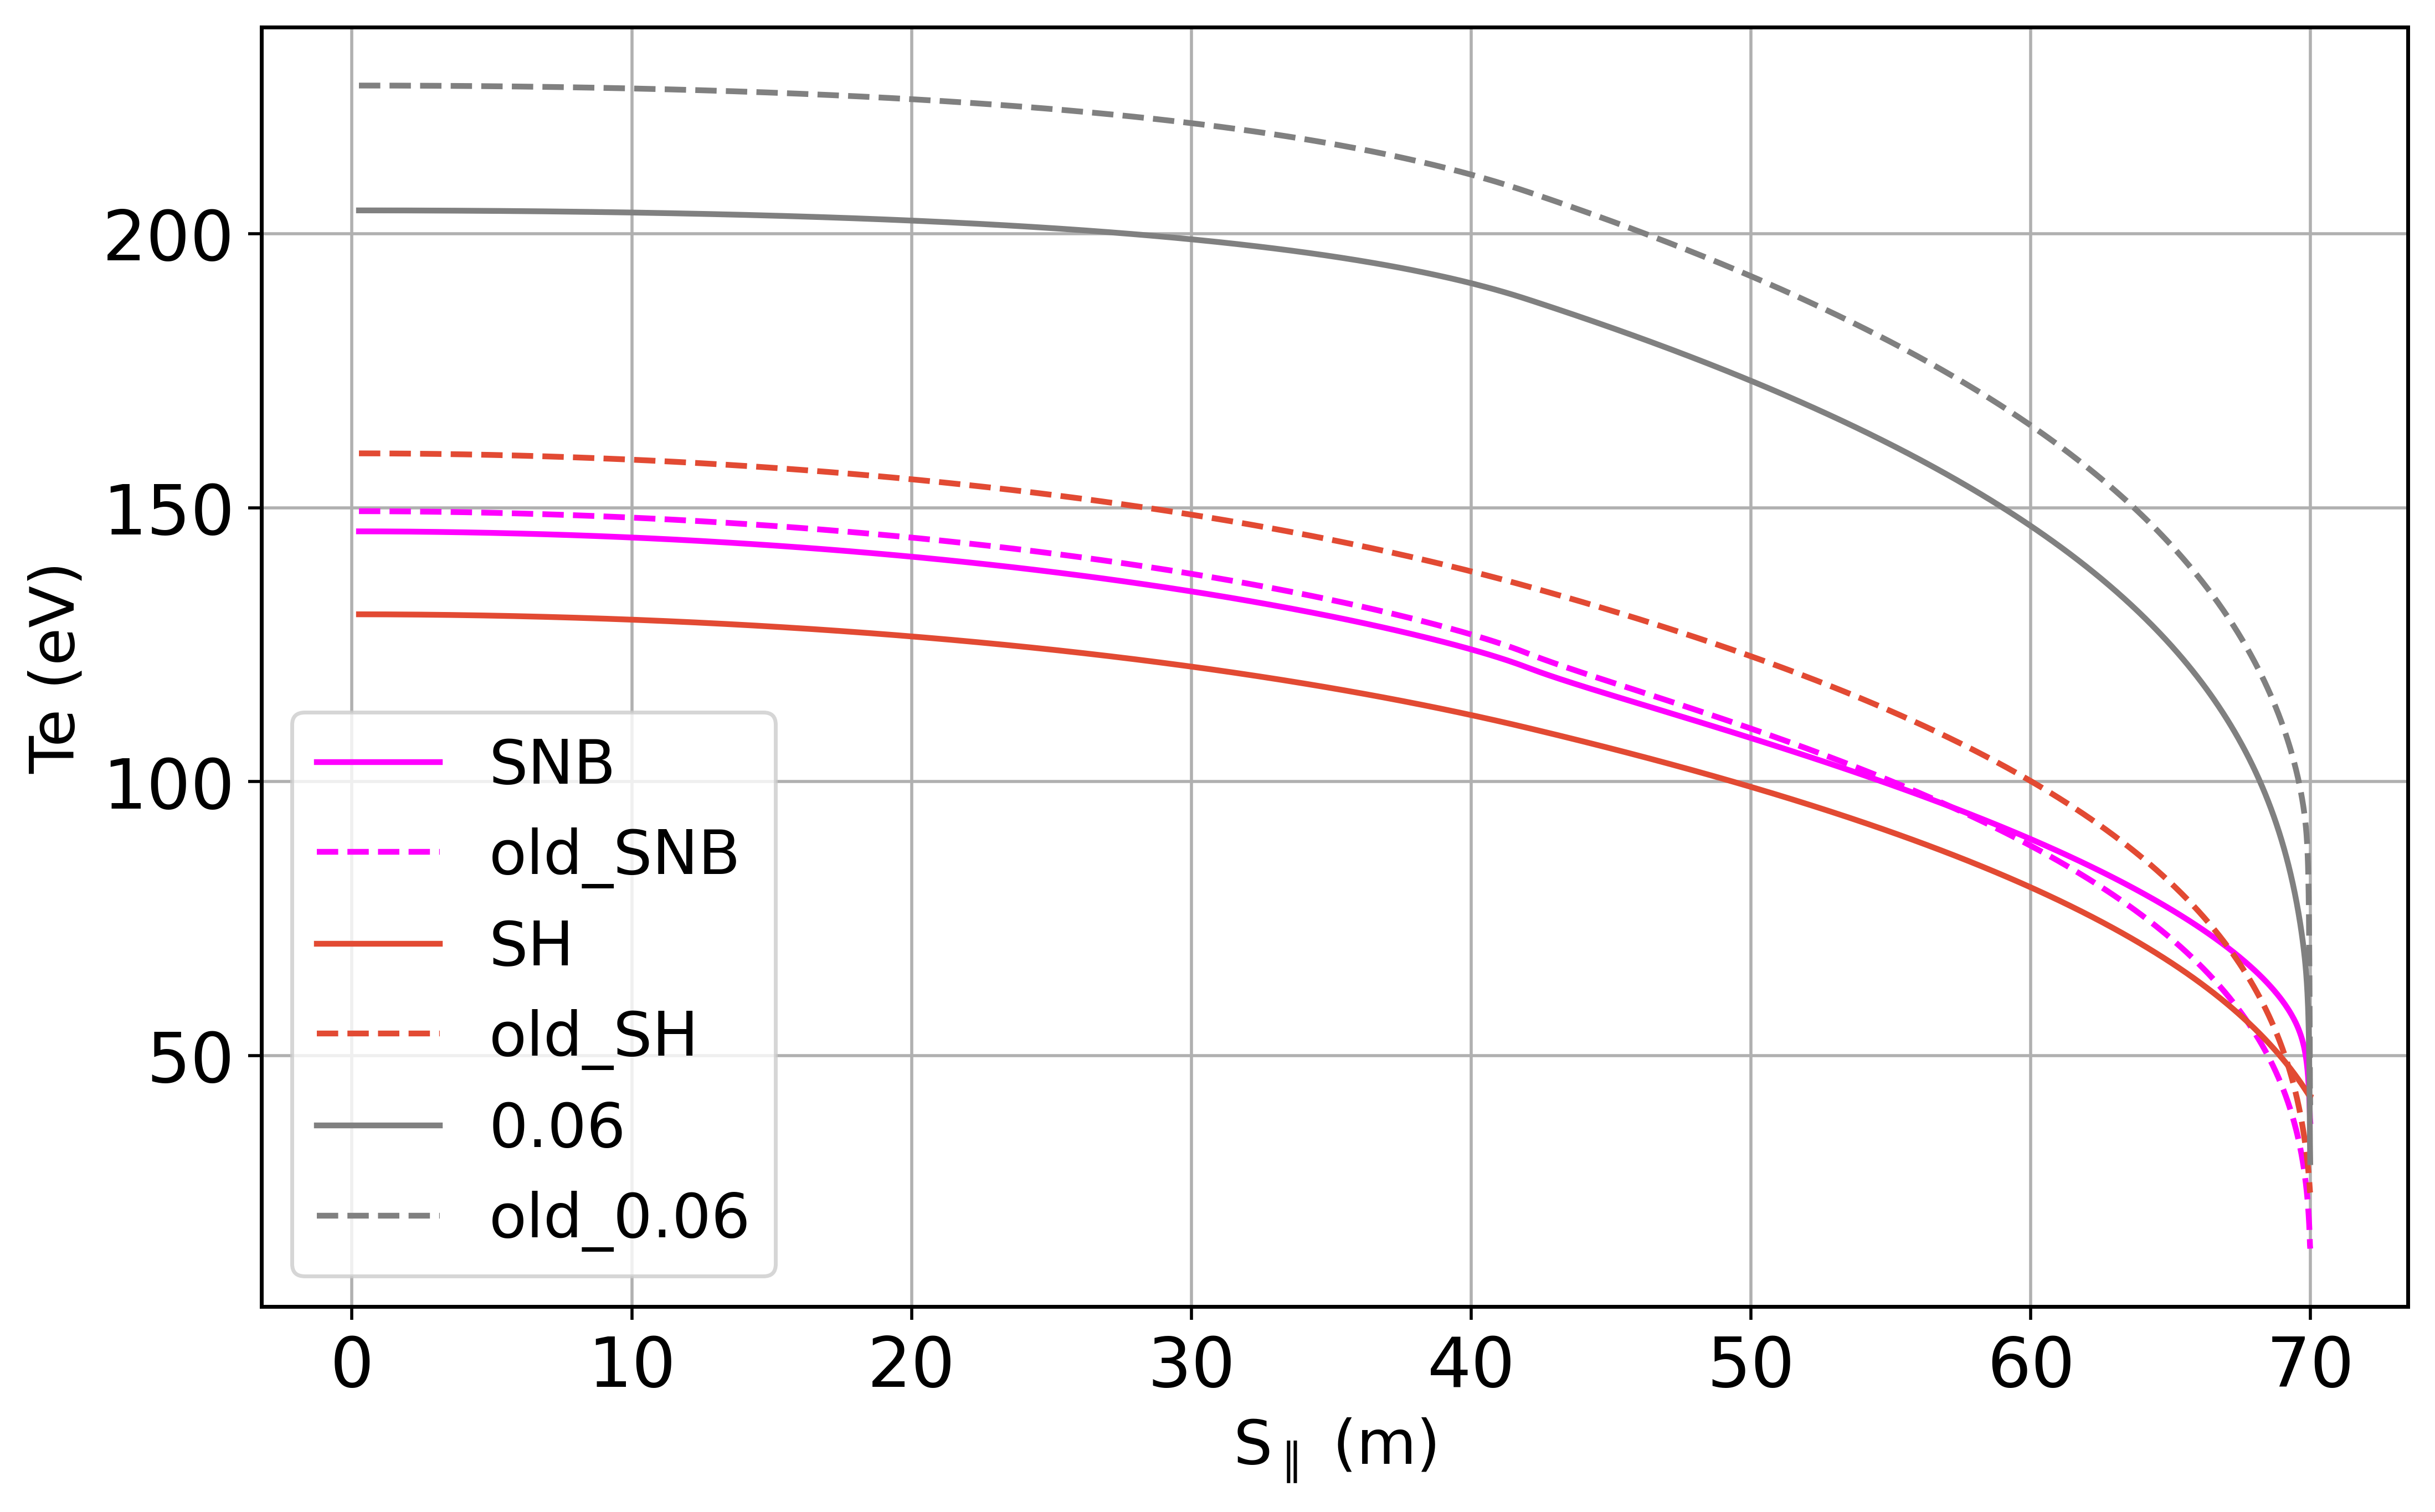

In [30]:
Te_snb = replace_guards(np.ravel(snb['Te'].values))
Te_sh = replace_guards(np.ravel(sh['Te'].values))
Te_fl006 = replace_guards(np.ravel(fl006['Te'].values))

x = ds_sh['y']

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 500)
ax.plot(x, Te_snb, label='SNB', color=colors['SNB'])
ax.plot(ds_snb['y'], ds_snb['Te'], color=colors['SNB'], label='old_SNB', linestyle='--')


ax.plot(x, Te_sh, label='SH', color=colors['SH'])
ax.plot(ds_sh['y'], ds_sh['Te'], color=colors['SH'], label='old_SH', linestyle='--')


ax.plot(x, Te_fl006, label='0.06', color=colors['0.06'])
ax.plot(ds_006['y'], ds_006['Te'], color=colors['0.06'], label='old_0.06', linestyle='--')
ax.legend()

ax.set_ylabel('Te (eV)')
ax.set_xlabel(r'S$_{\parallel}$ (m)')

# ax.set_xbound(65,70.05)
# ax.set_ybound(40, 100)
    

In [31]:
import plotly.graph_objects as go
import numpy as np

# Assuming replace_guards and the dataframes snb, sh, fl006, ds_sh, ds_snb, ds_006, and colors are defined

# Replace the guards in the data
Te_snb = replace_guards(np.ravel(snb['Te'].values))
Te_sh = replace_guards(np.ravel(sh['Te'].values))
Te_fl006 = replace_guards(np.ravel(fl006['Te'].values))

# Get the x values
x = ds_sh['y'].values

# Create the plot
fig = go.Figure()

# Add traces for each data series
fig.add_trace(go.Scatter(x=x, y=Te_snb, mode='lines', name='SNB', 
                         line=dict(color=colors['SNB'])))
fig.add_trace(go.Scatter(x=x, y=Te_sh, mode='lines', name='SH', 
                         line=dict(color=colors['SH'])))
fig.add_trace(go.Scatter(x=x, y=Te_fl006, mode='lines', name='0.06', 
                         line=dict(color=colors['0.06'])))
fig.add_trace(go.Scatter(x=ds_sh['y'].values, y=ds_sh['Te'].values, 
                         mode='lines', name='old_SH', 
                         line=dict(color=colors['SH'], dash='dash')))
fig.add_trace(go.Scatter(x=ds_snb['y'].values, y=ds_snb['Te'].values, 
                         mode='lines', name='old_SNB', 
                         line=dict(color=colors['SNB'], dash='dash')))
fig.add_trace(go.Scatter(x=ds_006['y'].values, y=ds_006['Te'].values, 
                         mode='lines', name='old_0.06', 
                         line=dict(color=colors['0.06'], dash='dash')))

# Set plot title and labels
fig.update_layout(title='Interactive Plotly Plot', 
                  xaxis_title='y', yaxis_title='Te')

fig.update_xaxes(range=[65, 70.05])

# Show the plot
fig.show()
